In [18]:
%matplotlib inline

In [19]:
# Data
import pandas as pd
import numpy as np

In [20]:
# Visualization
import seaborn as sns

In [21]:
trainDF = pd.read_csv("input/train.csv")
testDF = pd.read_csv("input/test.csv")
combine = pd.concat([trainDF, testDF], axis=0).reset_index(drop=True)

In [22]:
nulls = combine.isnull().sum().sort_values(ascending=False)
nulls = nulls[nulls > 0]
nulls

Cabin       1014
Survived     418
Age          263
Embarked       2
Fare           1
dtype: int64

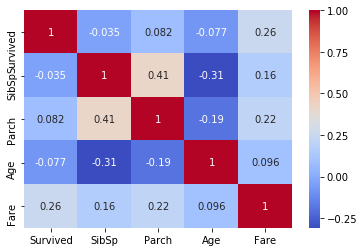

In [23]:
sns.heatmap(trainDF[['Survived', 'SibSp', 'Parch', 'Age', 'Fare']].corr(), annot=True, cmap='coolwarm')

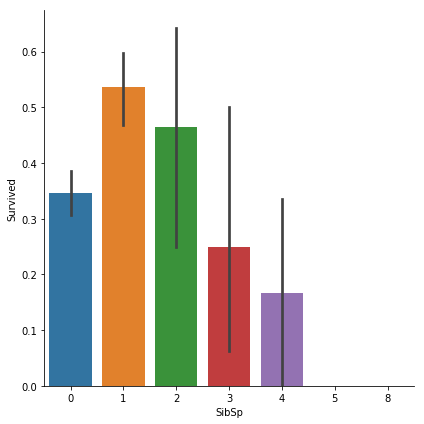

In [24]:
sns.factorplot(x='SibSp', y='Survived', data=trainDF, kind='bar', size=6)

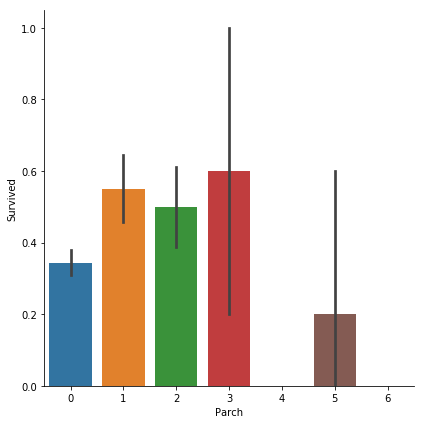

In [25]:
sns.factorplot(x='Parch', y='Survived', data=trainDF, kind='bar', size=6)

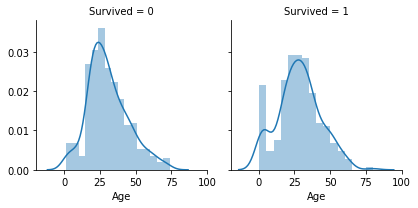

In [26]:
g = sns.FacetGrid(trainDF, col='Survived')
g = g.map(sns.distplot, "Age")

In [27]:
trainDF['Fare'] = trainDF['Fare'].fillna(trainDF['Fare'].median())

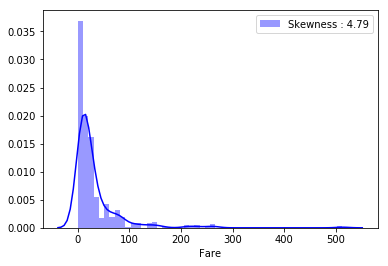

In [28]:
fares = trainDF['Fare']
g = sns.distplot(fares, color='b', label="Skewness : %.2f"%(fares.skew()))
g = g.legend(loc='best')

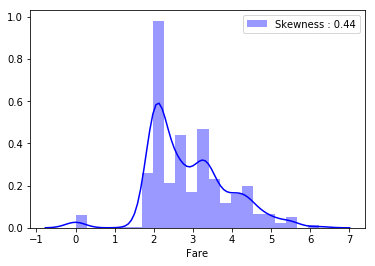

In [29]:
trainDF['Fare'] = fares.map(lambda x: np.log(x) if x > 0 else 0)

fares = trainDF['Fare']
g = sns.distplot(fares, color='b', label="Skewness : %.2f"%(fares.skew()))
g = g.legend(loc='best')

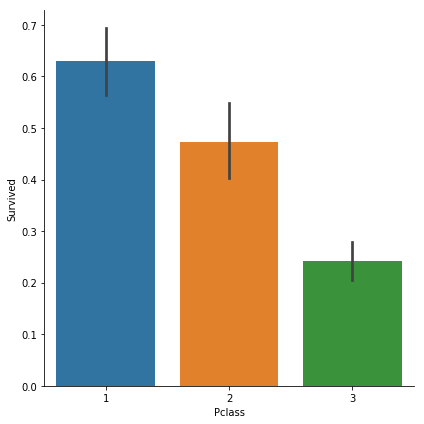

In [30]:
sns.factorplot(x='Pclass', y='Survived', data=trainDF, kind="bar", size=6)

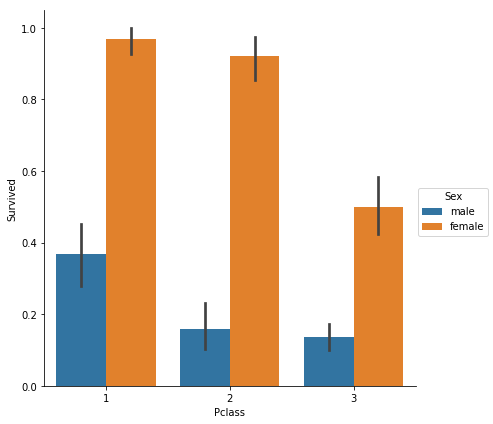

In [31]:
sns.factorplot(x='Pclass', y='Survived', hue='Sex', data=trainDF, kind="bar", size=6)

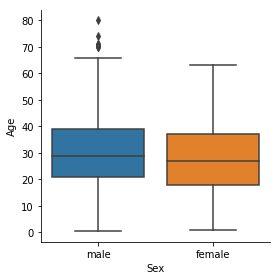

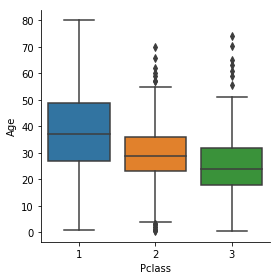

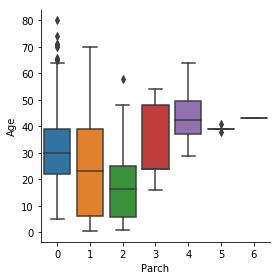

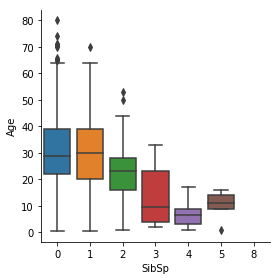

In [32]:
g = sns.factorplot(y='Age', x='Sex', data=trainDF, kind="box")
g = sns.factorplot(y='Age', x='Pclass', data=trainDF, kind="box")
g = sns.factorplot(y='Age', x='Parch', data=trainDF, kind="box")
g = sns.factorplot(y='Age', x='SibSp', data=trainDF, kind="box")